Use case: a company owns a job portal and has many job posts from other companies who wanna hire candidates. The company wants to have understanding of these job feeds in order to build a search engine. Your job is to do analysis on these data and feedback insights to the business

In [39]:
import pandas as pd
import numpy as np
from numpy.linalg import norm
import re

In [40]:
url = 'https://drive.google.com/file/d/16EGubjXaeDwTH7sc6FnuQj7EI9ZfRYNL/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data = pd.read_csv(path, sep = '\t')

### Perform proper analysis on the data
### Generate Word Cloud, you can follow this if you like https://www.datacamp.com/tutorial/wordcloud-python
### Apply data cleaning standard methods on the data to preprocess it
### Generate Word2Vec embeddings
### Try similarity functions of the word2vec
### Visiulaize some embeddings
### implement a streamlit and deploy your application

## Resources:
https://jalammar.github.io/illustrated-word2vec/

https://www.youtube.com/watch?v=hQwFeIupNP0

https://towardsdatascience.com/a-beginners-guide-to-word-embedding-with-gensim-word2vec-model-5970fa56cc92

https://www.kaggle.com/code/pierremegret/gensim-word2vec-tutorial/notebook

In [41]:
data.columns

Index(['Unnamed: 0', 'job_title', 'full_description', 'company', 'location'], dtype='object')

In [42]:
data = data[['job_title', 'full_description', 'company', 'location']]

In [43]:
data

,job_title,full_description,company,location
0,Senior Testmanager/Qualitätsmanager (m/w) Shif...,"Zum weiteren Ausbau unseres Teams, suchen wir ...",NTT DATA Deutschland GmbH,deutschlandweit
1,Junior Java Entwickler (m/w) in spannenden Ent...,Erfahrungen im Umgang mit objektorientierten P...,NTT DATA Deutschland GmbH,"Frankfurt a.M., Köln, München, Stuttgart, deut..."
2,(Senior)Technical Consultant (m/w) Testautomat...,DBS-8346-SR - Einsatzort: deutschlandweit - Wi...,NTT DATA Deutschland GmbH,deutschlandweit
3,Einsteiger (w/m) Digitalisierung und Data Anal...,Die globale EY-Organisation* ist einer der Mar...,Ernst & Young GmbH Wirtschaftsprüfungsgesellsc...,Deutschlandweit
4,Projektmanager / Managing Consultant (m/w) Cus...,Idealerweise über drei Jahre praktische Erfahr...,NTT DATA Deutschland GmbH,"Frankfurt a.M., Köln, München, deutschlandweit"
...,...,...,...,...
23477,Technischer Fachberater (m/w) im Innendienst,Sie haben eine kaufmännische bzw. technische A...,Rala GmbH & Co. KG,Ludwigshafen
23478,Wirtschaftsingenieur als Referent im Vertrieb ...,Die Deutsche Bahn ist nicht nur einer der wich...,Deutsche Bahn AG,Berlin
23479,IT Fachkraft m/w,"Standort: Heilbad Heiligenstadt (37308), Thüri...",Magna,Heilbad Heiligenstadt
23480,(Junior) Projektingenieur Sensorik und Kommuni...,Für unseren Geschäftsbereich Verteidigung & Si...,IABG Industrieanlagen - Betriebsgesellschaft mbH,"Ottobrunn bei München, Koblenz"


In [44]:
data.isna().sum()

job_title           0
full_description    0
company             0
location            0
dtype: int64

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23482 entries, 0 to 23481
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   job_title         23482 non-null  object
 1   full_description  23482 non-null  object
 2   company           23482 non-null  object
 3   location          23482 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


### check how many Job Openings are there in Berlin, Stuttgart, München

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
data_1 = data.copy()
data_1.explode("location")
data_1 = data_1.loc[data['location'].isin(["Berlin", "Stuttgart", "München", "Köln", "Frankfurt", "Hamburg"]), :]

In [48]:
data_1.reset_index(inplace = True)

In [49]:
data_1

,index,job_title,full_description,company,location
0,16,Developer/Projektleiter (w/m),Als Teil unseres zentralen und internationalen...,BMW Group,München
1,27,MAGENTO2 ENTWICKLER (FULLSTACK) m/w,"MAGENTO2 ENTWICKLER Hi, wir sind der Durstexpr...",DURSTEXPRESS GmbH,Berlin
2,52,Komponentenverantwortlicher Entwickler Fahrwer...,"Standort: München, Bayern * flexible Arbeitsze...",Magna,München
3,66,Konstrukteur / Entwickler Hochvoltspeicher (w/m),Für den Unternehmensbereich Forschung / Entwic...,BMW Group,München
4,71,Engineer (m/w) Dynamics NAV,Das erwartet dich bei uns * Zusammen mit dem P...,Flaconi GmbH,Berlin
...,...,...,...,...,...
5493,23473,Elektroingenieur (m/w) Connected Car,"mplan m-plan Wireless, Ingenieur Elektronik, P...",M Plan GmbH,Köln
5494,23474,Elektrokonstrukteur (m/w),Ihr Ansprechpartner - Frau Gabriele Staneker -...,FERCHAU Engineering GmbH,Stuttgart
5495,23476,Bauingenieur als Bauüberwacher / Bauleiter (w/m),Die Deutsche Bahn ist nicht nur einer der wich...,Deutsche Bahn AG,München
5496,23478,Wirtschaftsingenieur als Referent im Vertrieb ...,Die Deutsche Bahn ist nicht nur einer der wich...,Deutsche Bahn AG,Berlin


<Figure size 1500x1000 with 0 Axes>

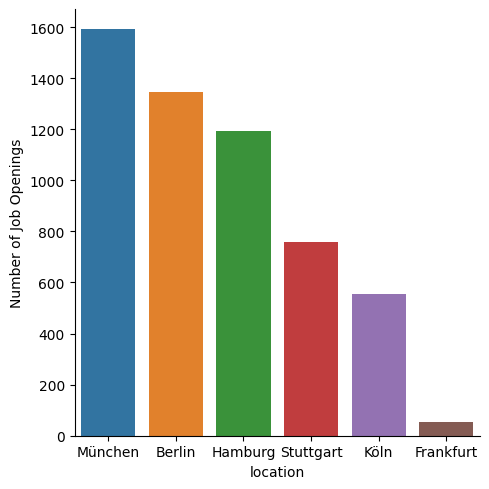

In [50]:
# see the distribution of jobs in different locations

sorted_locations = data_1['location'].value_counts().sort_values(ascending=False).index

plt.figure(figsize=(15,10))
sns.catplot(data=data_1,
            x="location",
            kind = "count",
            order = sorted_locations
        );
plt.ylabel("Number of Job Openings")
plt.show()

# Generate WordCloud

Wordcloud is basically a visualization technique to represent the frequency of words in a text where the size of the word represents its frequency

import necessary libraries like

numpy

matplotlib

WordCloud

PIL - Python Imaging library

In [51]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [52]:
?WordCloud

## Start with a simple input
So let's start with a simple example: using the last observation in **"full_description"** column from **data** table as the input for the word cloud. The three steps are:

1. Extract the review (text document)

2. Create and generate a wordcloud image

3. Display the cloud using matplotlib

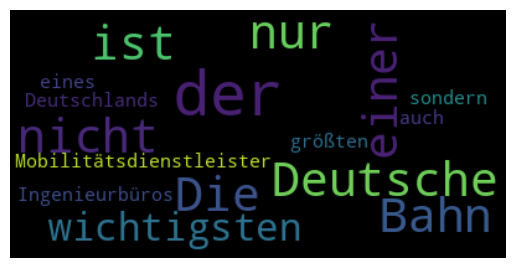

In [53]:
# Start with one job_description:
text = data.full_description[23481]

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=200, background_color="black").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Combining data :

combine all the words from "**full_description**" column from **data** table

In [54]:
text = " ".join(word for word in data.full_description)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 4290946 words in the combination of all review.


In [55]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
print(stopwords.words('german'))

['aber', 'alle', 'allem', 'allen', 'aller', 'alles', 'als', 'also', 'am', 'an', 'ander', 'andere', 'anderem', 'anderen', 'anderer', 'anderes', 'anderm', 'andern', 'anderr', 'anders', 'auch', 'auf', 'aus', 'bei', 'bin', 'bis', 'bist', 'da', 'damit', 'dann', 'der', 'den', 'des', 'dem', 'die', 'das', 'dass', 'daß', 'derselbe', 'derselben', 'denselben', 'desselben', 'demselben', 'dieselbe', 'dieselben', 'dasselbe', 'dazu', 'dein', 'deine', 'deinem', 'deinen', 'deiner', 'deines', 'denn', 'derer', 'dessen', 'dich', 'dir', 'du', 'dies', 'diese', 'diesem', 'diesen', 'dieser', 'dieses', 'doch', 'dort', 'durch', 'ein', 'eine', 'einem', 'einen', 'einer', 'eines', 'einig', 'einige', 'einigem', 'einigen', 'einiger', 'einiges', 'einmal', 'er', 'ihn', 'ihm', 'es', 'etwas', 'euer', 'eure', 'eurem', 'euren', 'eurer', 'eures', 'für', 'gegen', 'gewesen', 'hab', 'habe', 'haben', 'hat', 'hatte', 'hatten', 'hier', 'hin', 'hinter', 'ich', 'mich', 'mir', 'ihr', 'ihre', 'ihrem', 'ihren', 'ihrer', 'ihres', 'euc

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


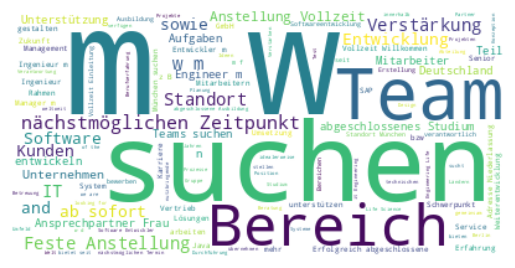

In [56]:
# Create stopword list:
stopwords = set(stopwords.words('german'))

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Generate WordCloud for **job_title** column from **data** table

In [57]:
text_1 = " ".join(word for word in data.job_title)
print ("There are {} words in the combination of all review.".format(len(text_1)))

There are 1143957 words in the combination of all review.


In [58]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
print(stopwords.words('german'))

['aber', 'alle', 'allem', 'allen', 'aller', 'alles', 'als', 'also', 'am', 'an', 'ander', 'andere', 'anderem', 'anderen', 'anderer', 'anderes', 'anderm', 'andern', 'anderr', 'anders', 'auch', 'auf', 'aus', 'bei', 'bin', 'bis', 'bist', 'da', 'damit', 'dann', 'der', 'den', 'des', 'dem', 'die', 'das', 'dass', 'daß', 'derselbe', 'derselben', 'denselben', 'desselben', 'demselben', 'dieselbe', 'dieselben', 'dasselbe', 'dazu', 'dein', 'deine', 'deinem', 'deinen', 'deiner', 'deines', 'denn', 'derer', 'dessen', 'dich', 'dir', 'du', 'dies', 'diese', 'diesem', 'diesen', 'dieser', 'dieses', 'doch', 'dort', 'durch', 'ein', 'eine', 'einem', 'einen', 'einer', 'eines', 'einig', 'einige', 'einigem', 'einigen', 'einiger', 'einiges', 'einmal', 'er', 'ihn', 'ihm', 'es', 'etwas', 'euer', 'eure', 'eurem', 'euren', 'eurer', 'eures', 'für', 'gegen', 'gewesen', 'hab', 'habe', 'haben', 'hat', 'hatte', 'hatten', 'hier', 'hin', 'hinter', 'ich', 'mich', 'mir', 'ihr', 'ihre', 'ihrem', 'ihren', 'ihrer', 'ihres', 'euc

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


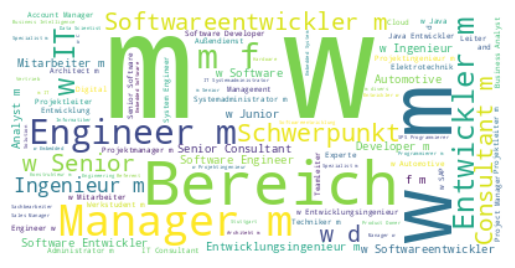

In [59]:
# Create stopword list:
stopwords = set(stopwords.words('german'))

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text_1)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Generate Word2Vec embeddings:

Let’s try to understand the hyperparameters of this model.

sentences: This attribute represents the corpus of text used for training the word embeddings. It can be a list of sentences or a generator object that yields sentences.

vector_size: This attribute determines the dimensionality of the word vectors. It specifies the number of dimensions in the word embedding space. For example, size=100 means that each word will be represented by a vector of length 100.

window: This attribute sets the window size, which is the maximum distance between the current and predicted word within a sentence. Words outside this window are not considered as context words during training.

min_count: This attribute specifies the minimum frequency threshold for words to be included in the vocabulary. Words that occur fewer times than min_count will be ignored during training.

sg: This attribute controls whether to use the Skip-gram (sg=1) or Continuous Bag of Words (sg=0) algorithm for training. The Skip-gram model aims to predict context words given a target word, while the Continuous Bag of Words model predicts the target word based on its context words.

epochs: This attribute determines the number of training epochs (iterations) over the corpus.

These are just a few of the attributes that can be set when creating a Word2Vec object. You can refer to the official documentation of gensim for a complete list of attributes and their descriptions.

In [60]:
# before moving to Word2Vec , convert "job_title" column entries to lower case
data['job_title_lower'] = data['job_title'].str.lower()

In [61]:
# remove commas
data['job_title_lower'] = data['job_title_lower'].str.replace(',', '')

In [62]:
# remove (m/w)  and (w/m)
data['job_title_lower'] = data['job_title_lower'].str.replace(r'\s*\([mw][/][mw]\)', '', regex=True)


In [63]:
data["job_title_lower"].head()

0       senior testmanager/qualitätsmanager shift left
1    junior java entwickler in spannenden enterpris...
2     (senior)technical consultant testautomatisierung
3    einsteiger digitalisierung und data analytics ...
4    projektmanager / managing consultant customer ...
Name: job_title_lower, dtype: object

In [64]:
import gensim
from gensim.models import Word2Vec

### Word2Vec(sentences, size, window, min_count) : the parameter "sentences"  requires that a format of ‘list of lists’ for training where every document(every entry in that column) contains list of words and every list(i,e every row or every entry )contains lists of tokens of that document

In [65]:
#df['job_title_lower'].str.split(" ").tolist()
sentence_list = [row.split(",") for row in data["job_title_lower"]]

In [66]:
sentence_list

[['senior testmanager/qualitätsmanager shift left'],
 ['junior java entwickler in spannenden enterprise crm projekten'],
 ['(senior)technical consultant testautomatisierung'],
 ['einsteiger digitalisierung und data analytics der finanzprozesse / berlin düsseldorf hamburg frankfurt/main oder stuttgart'],
 ['projektmanager / managing consultant customer relationship management'],
 ['entwickler/in antriebs- und regelungstechnik'],
 ['entwickler bremssystem für hochautonomes fahren'],
 ['entwickler technologie und innovation'],
 ['informatica entwickler'],
 ['dms-entwickler'],
 ['it-consultant portal & mobile solutions'],
 ['vertriebsingenieur/in im außendienst für neuanlagen für das verkaufsgebiet hessen-bayern-ostdeutschland'],
 ['developer & architect iot- und digitale plattformen'],
 ['lead consultant big data (hadoop)'],
 ['entwickler/in für antriebs-diagnose pkw'],
 ['senior consultant sap bw/hana'],
 ['developer/projektleiter'],
 ['entwickler c# html5 und javascript'],
 ['senior con

In [67]:
model_1 = Word2Vec(sentence_list, min_count =1 , vector_size = 50, workers=3, window =3, sg = 1)

Once a Word2Vec model is fitted, you can access several attributes and methods to explore and utilize the trained word embeddings. Here are some common attributes and methods of a fitted Word2Vec model:

### wv: This attribute provides access to the word vectors. You can perform operations on word vectors using this attribute. For example, you can retrieve the vector representation of a word using model.wv['word'] or find similar words using model.wv.most_similar('word').

vocabulary: This attribute contains the vocabulary of the trained model. It is a dictionary-like object that maps words to their corresponding index in the embedding matrix. You can access the vocabulary using model.wv.vocab.

vector_size: This attribute returns the dimensionality of the word vectors. It provides the size of the vectors as specified during model training.

trainables: This attribute contains additional information related to training. For example, you can access the model's weights using model.trainables.syn1 or model.trainables.syn1neg.

save() and load(): These methods allow you to save the trained model to disk (model.save('filename')) and load a saved model (model = Word2Vec.load('filename')).

### most_similar(): This method returns the most similar words to a given word based on their vector similarity. For example, model.wv.most_similar('word') returns a list of similar words and their similarity scores.

### similarity(): This method calculates the similarity between two words based on their vector representations. For example, model.wv.similarity('word1', 'word2') returns the similarity score between 'word1' and 'word2'.

doesnt_match(): This method identifies the word that does not fit in a given list of words. It is based on the concept that the odd word is expected to have a larger dissimilarity from the others. For example, model.wv.doesnt_match(['word1', 'word2', 'word3']) returns the word that does not match the others.

In [68]:
data["job_title_lower"][101]

'junior java-backend-entwickler'

In [69]:
data["job_title_lower"][1001]

'sap-entwickler im bereich handel'

In [70]:
model_1.wv["dms-entwickler"]

array([ 0.01536464,  0.00799956, -0.00539816,  0.01923706,  0.01517757,
       -0.0091335 , -0.00554757,  0.01485211,  0.01494465, -0.00796159,
        0.01563065, -0.00351606, -0.00640683,  0.01519188, -0.011118  ,
        0.00373998, -0.01438597, -0.01828506,  0.01188127, -0.01102711,
        0.01589881, -0.01316178, -0.00821611,  0.00126515, -0.00196037,
       -0.01107844, -0.0141155 , -0.00476068,  0.01442409, -0.00105693,
       -0.01195335, -0.01361152,  0.01185393,  0.00726946, -0.01293606,
        0.00860211,  0.00680897,  0.00153702,  0.01603754, -0.01222179,
        0.00789344,  0.00271348,  0.00575639, -0.00895321,  0.00388751,
       -0.00394876,  0.01965477, -0.00852337,  0.0065969 ,  0.0100542 ],
      dtype=float32)

In [71]:
np.shape(model_1.wv["dms-entwickler"])

(50,)

## Compute similarities:

We also can use the built-in function model.wv.most_similar() to get a set of the most similar words for a given word based on the Euclidean distance.



In [72]:
model_1.wv.most_similar('dms-entwickler')

[('kfz-mechatroniker im versuchsbau', 0.5344768166542053),
 ('systemtester steuergeräte automotive', 0.5169220566749573),
 ('sap-anwendungsbetreuer mm/wm und qm', 0.5016372799873352),
 ('vergabemanager / procurement specialist planungs- beratungs- und baulösungen',
  0.4737108051776886),
 ('it business consultant vertrieb digital signage & elektronische preisauszeichnung',
  0.45194876194000244),
 ('informatiker als experte management it-architektur', 0.4449036419391632),
 ('abschlussarbeit entwicklung eines sgemented lcd-moduls als preiswerter ersatz für ein dot-matrix lcd als display für ein elektrisch angetriebenes motorrad',
  0.44434770941734314),
 ('it application manager e-commerce / fulfillment', 0.4442838728427887),
 ('database support engineer integration', 0.44139790534973145),
 ('gärtnermeister/in oder gartenbauingenieur/in', 0.4407973885536194)]

In [73]:
model_1.wv.similarity('dms-entwickler', 'junior java-backend-entwickler')

0.09598739

# Cosine Similarity:

However, Euclidian similarity cannot work well for the high-dimensional word vectors. This is because Euclidian similarity will increase as the number of dimensions increases, even if the word embedding stands for different meanings. Alternatively, we can use cosine similarity to measure the similarity between two vectors. Mathematically, it measures the cosine of the angle between two vectors projected in a multi-dimensional space. The cosine similarity captures the angle of the word vectors and not the magnitude.

In [74]:
def cosine_similarity (model, word, target_list_words, num) :
    cosine_dict ={}
    word_list = []
    a = model.wv[word]
    for item in target_list_words :
        if item != word :
            b = model.wv[item]
            cos_sim = np.dot(a, b)/(norm(a)*norm(b))
            cosine_dict[item] = cos_sim

  #'x' is the parameter of the lambda function. It represents each item (key-value pair) from the cosine_dict.items() list during the sorting process.
  # x[1] accesses the second element of the tuple (key-value pair), which corresponds to the value of the key-value pair.
    dist_sort=sorted(cosine_dict.items(), key=lambda x: x[1],reverse = True) ## in Descedning order

  #returns 'num' set of cosine-similarities between target_list_words and word
    for item in dist_sort:
        word_list.append((item[0], item[1]))
    return word_list[0:num]

In [75]:
# only get the unique Maker_Model
target_list_words = list(data['job_title_lower'].unique())
target_list_words[: 10]

['senior testmanager/qualitätsmanager shift left',
 'junior java entwickler in spannenden enterprise crm projekten',
 '(senior)technical consultant testautomatisierung',
 'einsteiger digitalisierung und data analytics der finanzprozesse / berlin düsseldorf hamburg frankfurt/main oder stuttgart',
 'projektmanager / managing consultant customer relationship management',
 'entwickler/in antriebs- und regelungstechnik',
 'entwickler bremssystem für hochautonomes fahren',
 'entwickler technologie und innovation',
 'informatica entwickler',
 'dms-entwickler']

In [76]:
# call the cosine_similarity function
cosine_similarity (model_1, "junior java-backend-entwickler", target_list_words, 15)

[('anwendungsentwickler workflow und prozessautomatisierung', 0.55525506),
 ('(senior) android architekt', 0.54241455),
 ('ingenieur oder architekt für den bereich einkauf', 0.50530934),
 ('cloud spezialist', 0.49875948),
 ('senior erp-systembetreuer proalpha _ international erfolgreiche unternehmensgruppe!',
  0.498709),
 ('entwicklungsingenieur automotive embedded systems', 0.49238247),
 ('produktdesigner lifestyle & interior', 0.48166758),
 ('projektingenieur schwerpunkt fahrwerksentwicklung', 0.46644232),
 ('ingenieur als teamleiter für die konstruktion von ottomotoren', 0.46469125),
 ('software developer c++/c#/herten', 0.4645025),
 ('business developer smart city', 0.46295598),
 ('junior-vertriebsingenieur', 0.46276748),
 ('bauingenieur bauleitung', 0.45936874),
 ('senior projektleiter (m/w/d)', 0.45849073),
 ('(junior) technical consultants web content management / portale / suchtechnologien',
  0.45124972)]